In [38]:
import pandas as pd
import numpy as np
from pykospacing import Spacing
from collections import OrderedDict

In [39]:
def spacing(sentence):
    spacing = Spacing()
    return spacing(sentence)

In [40]:
def find_status_sentence(sentence):
    split_sentence = sentence.split()
    output_list = []
    for status in status_list:
        try:
            for token in split_sentence:
                if status in token:
                    status_index = split_sentence.index(status)
                    status_word_list = split_sentence[status_index:status_index+3]
                    status_sentence = ' '.join(status_word_list)
                    output_list.append(status_sentence)
        except:
            pass
    return output_list

In [41]:
def normalization(list):
    a = ''.join(list).replace(' ', '')
    return ''.join(OrderedDict.fromkeys(a))

In [42]:
def to_nan(sentence):
    if len(sentence) < 1:
        return np.nan
    else:
        return sentence

In [43]:
def stop_word(sentence):
    new_sentence = sentence
    for stop_word in stop_words:
        new_sentence = new_sentence.replace(stop_word, '')
    return new_sentence

In [44]:
def preprocessing(df):       
    df['desc'] = df['desc'].apply(spacing)
    df['status_token'] = df['desc'].apply(find_status_sentence)
    df['status_sentence'] = df['status_token'].apply(normalization)
    df['status_sentence'] = df['status_sentence'].apply(to_nan)
    df.dropna(how='any', inplace=True)
    df['status_sentence'] = df['status_sentence'].apply(spacing)
    df['sw_status_sentence'] = df['status_sentence'].apply(stop_word)
    return df[['sw_status_sentence', 'label']]

In [45]:
status_list = ['기스', '액정', '흠집', '모서리', '미개봉', '새상품', '거의', '상태', '파손', '점', '잔상', '찍힘']
stop_words = ['아이패드', '프로세대', '프로', '세대', '직거래는', '애플', '케어', '애플케어', '형', '네', '네고', '직거래만', '가입', '가입되', '직거래합니다', '예정이고', '할', '흥정', '교환', '멍습니다', '만', '만원', '원']

In [52]:
df = pd.read_csv('아이패드 프로 12.9 5세대_크롤링.csv', encoding='cp949')
df = df[['Unnamed: 5', 'label']]
df.columns = ['desc', 'label']
df.dropna(how='any', inplace=True)
df

,desc,label
0,아이패드프로 세대 스페이스그레이 풀박스거의사용 안함 액정 본체 전부 깨끗합니다,1.0
1,아이패드프로 세대 스페이스그레이 팝니다 애플케어플러스 주말에 시간씩 영상시청용도로 ...,1.0
2,아이패드 프로 세대 이며거의 사용을 안해서 상태가 매우 좋습니다구성품으로 아이패드...,1.0
4,아이패드 프로 세대 구매일자 애플케어 기스나 흠집 없고 상태 매우 좋습니다네고문의 ...,1.0
5,아이패드프로 세대칩 장착모델입니다 와이파이전용 인치 기가 와이파이전용 인치 기가 와...,0.0
...,...,...
574,미개봉 아이패드 프로 세대 형 실버 애케플 까지와이프주려고샀는데안한데서 팝니다 경남...,0.0
575,월 일 도착하는 사전예약 제품입니다 선물용으로 구매했는데 못주게 되어서 그냥 취소할...,0.0
577,아이패드 프로 세대 인치 스페이스그레이쿠팡 차 사전예약분 월 일 도착예정배송비 변경...,0.0
578,공홈에서 구입했어며 월 일 도착예정입니다 비싼 기기인만큼 미개봉 그대로 직거래로만 ...,0.0


In [53]:
new_df = preprocessing(df)

In [54]:
new_df

,sw_status_sentence,label
0,거의 사용안함,1.0
1,기스찍힘 없이 새것,1.0
2,거의 사용을 안 해서,1.0
4,흠집 없고 상태 매우 좋습니다 문의,1.0
5,미개봉 새 상품입니다,0.0
...,...,...
560,기스 없고,1.0
569,미개봉 새 제품이며,0.0
573,미개봉 가격,0.0
574,미개봉,0.0


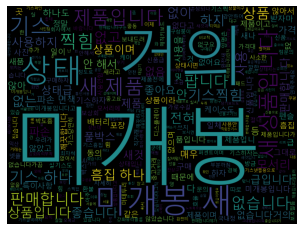

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(font_path='C:\Windows\Fonts\malgunsl.ttf', width=800, height=600, max_words=400).generate(' '.join(new_df['sw_status_sentence']))

plt.imshow(wc)
plt.axis('off')
plt.show()

In [28]:
new_df.to_csv('갤럭시 파손_전처리_ver2.0.csv')